# Imports

In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [74]:
import pandas as pd

def import_aqi_data(folder_path):
    """
    Import annual AQI dataframes from CSV files into a folder.

    Args:
    takes in a path to the the file .

    Returns:
    a dictionary containing pandas dataframes, with keys as 'aqi_year'.
    """
    aqi_dataframes = {}

    # Iterating through the files in the folder
    for file_name in os.listdir(folder_path):
        # Checking if the file is a CSV file and follows the naming format
        if file_name.endswith('.csv') and file_name.startswith('annual_aqi_by_county_'):
            # Extracting the year from file name
            year = file_name.split('_')[-1].split('.')[0]
            # Reading in the CSV file into a pandas dataframe
            df = pd.read_csv(os.path.join(folder_path, file_name))
            # Storing the dataframe in the dictionary with the key 'aqi_year'
            aqi_dataframes[f'aqi_{year}'] = df

    return aqi_dataframes

folder_path = './data'
all_aqi_dataframes = import_aqi_data(folder_path)

# Concatenating all the dataframes
aq_df = pd.concat(all_aqi_dataframes.values(), ignore_index=True)

# Exploratory Data Analysis

[Description of the data from the epa website](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_annual_summary_files)

What do we want to be explring?

US geography - for visualising, consider consolidating states into US areas (east coast etc)
1. good days etc
2. gases against year and state

   what kind of history has led to these trends?

In [15]:
aq_df.head()

State      County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama     Cullman  1985            214        144             59   
1  Alabama      Etowah  1985            282        176             81   
2  Alabama   Jefferson  1985            365        202            130   
3  Alabama      Mobile  1985            284        214             58   
4   Alaska  Anchorage   1985            365        228            116   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                   11               0                    0   
1                                   23               2                    0   
2                                   25               7                    1   
3                                   11               1                    0   
4                                   19               2                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0      150                   87          44        0   
1               0      154                   97          45        0   
2               0      202                  100          48      113   
3               0      172                   71          40        0   
4               0      154                   84          38      292   

   Days NO2  Days Ozone  Days PM2.5  Days PM10  
0         0         214           0          0  
1         0         257           0         25  
2         0         171           0         81  
3         0         255           0         29  
4         0          46           0         27

In [49]:
aq_df.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10'],
      dtype='object')

**Visualising Good, Moderate Unhealthy Days by State by Year**

Good Days 

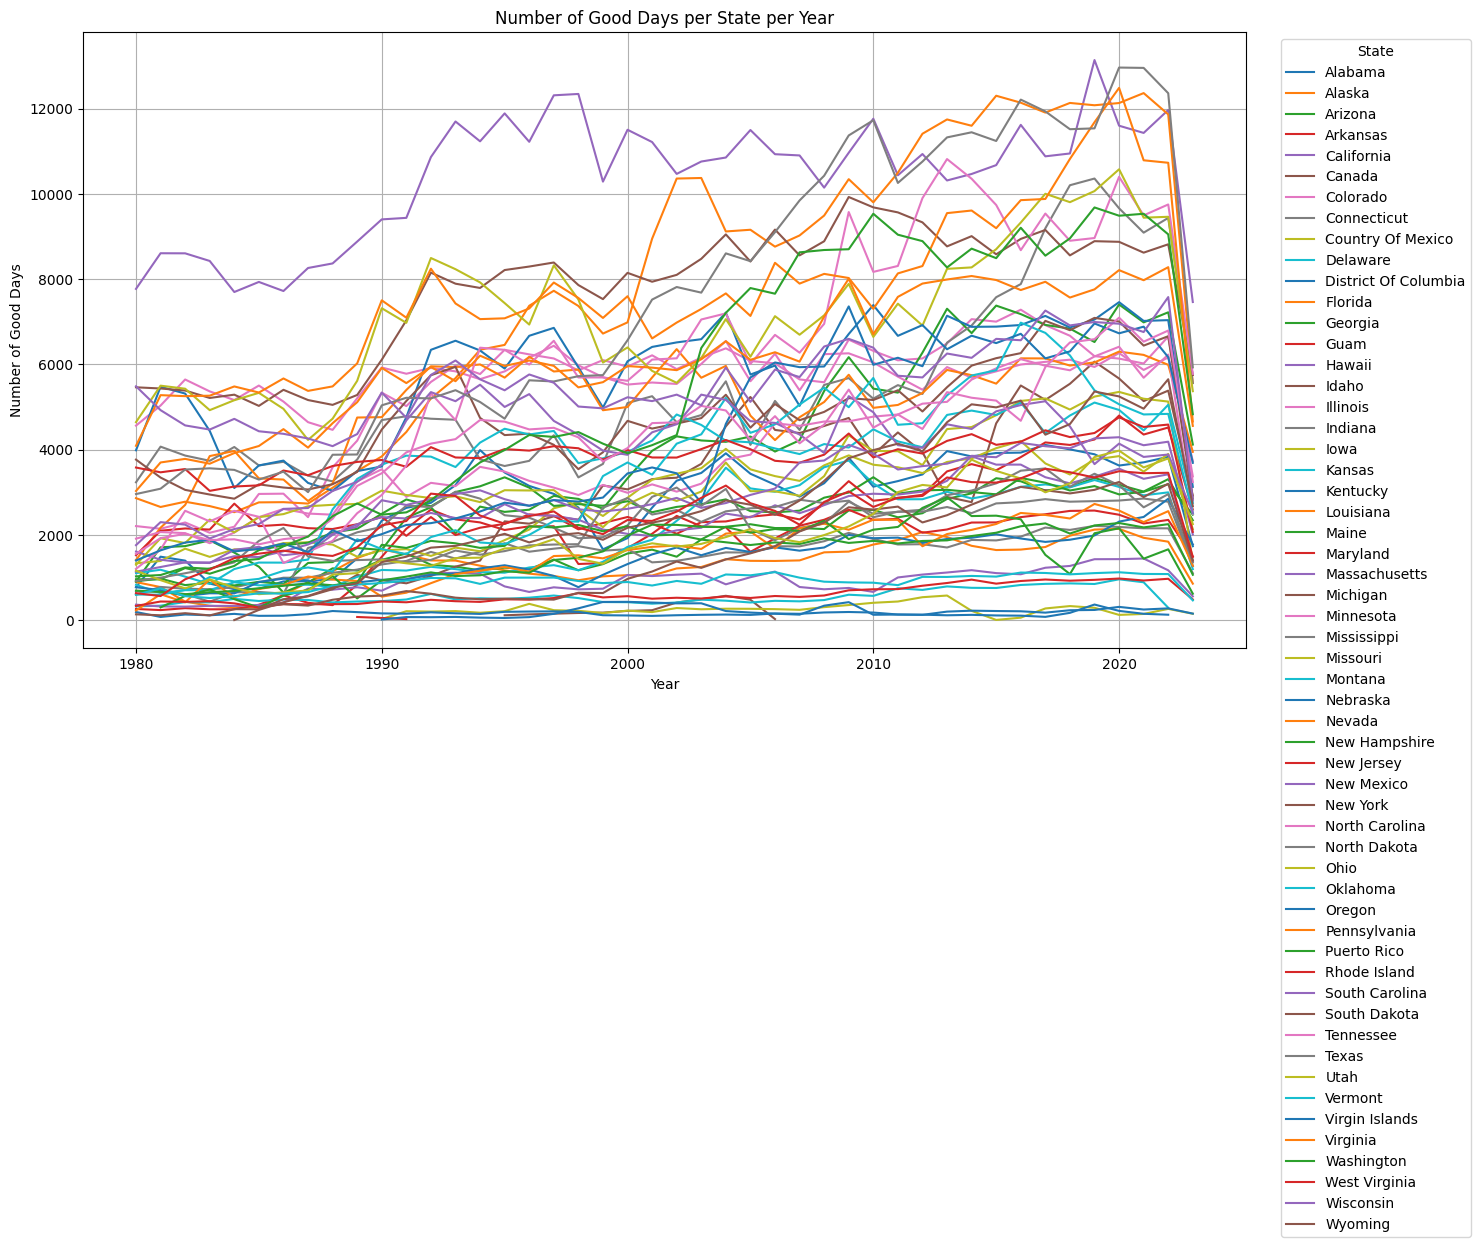

In [57]:
good_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Good Days'].sum().reset_index()

states = good_days_per_state_per_year['State'].unique()

plt.figure(figsize=(15, 8)) 

for state in states:
    state_data = good_days_per_state_per_year[good_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Good Days'], label=state)

plt.title('Number of Good Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Good Days')
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

Moderate days

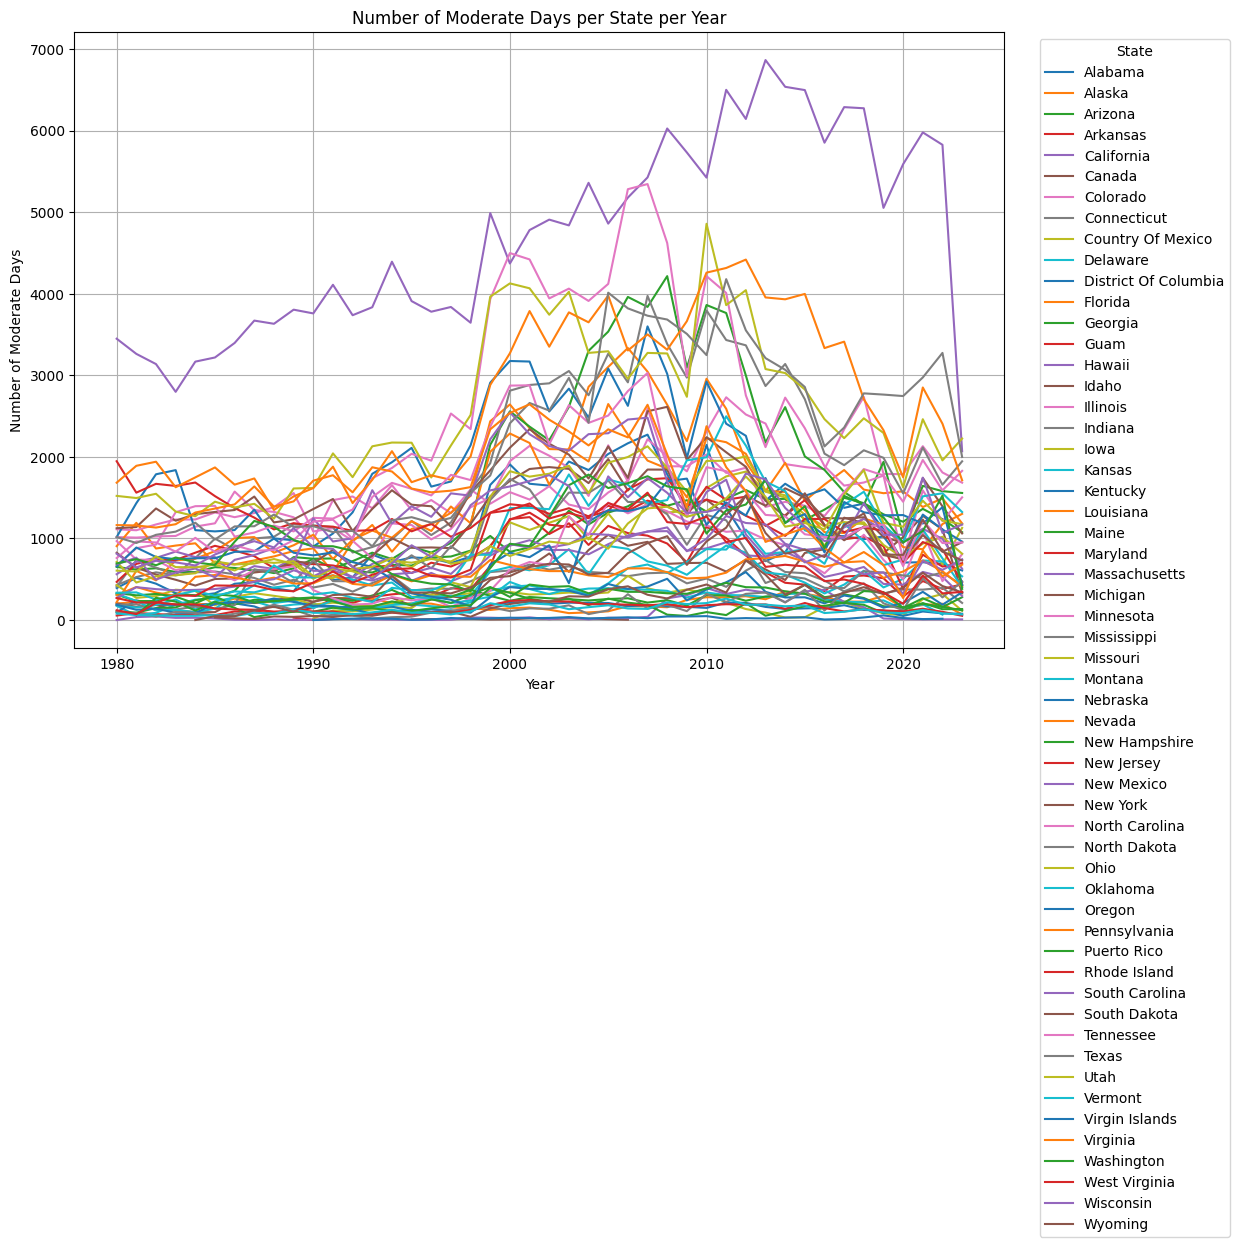

In [64]:
moderate_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Moderate Days'].sum().reset_index()

states = moderate_days_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8))  

for state in states:
    state_data = moderate_days_per_state_per_year[moderate_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Moderate Days'], label=state)

plt.title('Number of Moderate Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Moderate Days')
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()

Unhealthy for sensitive groups days

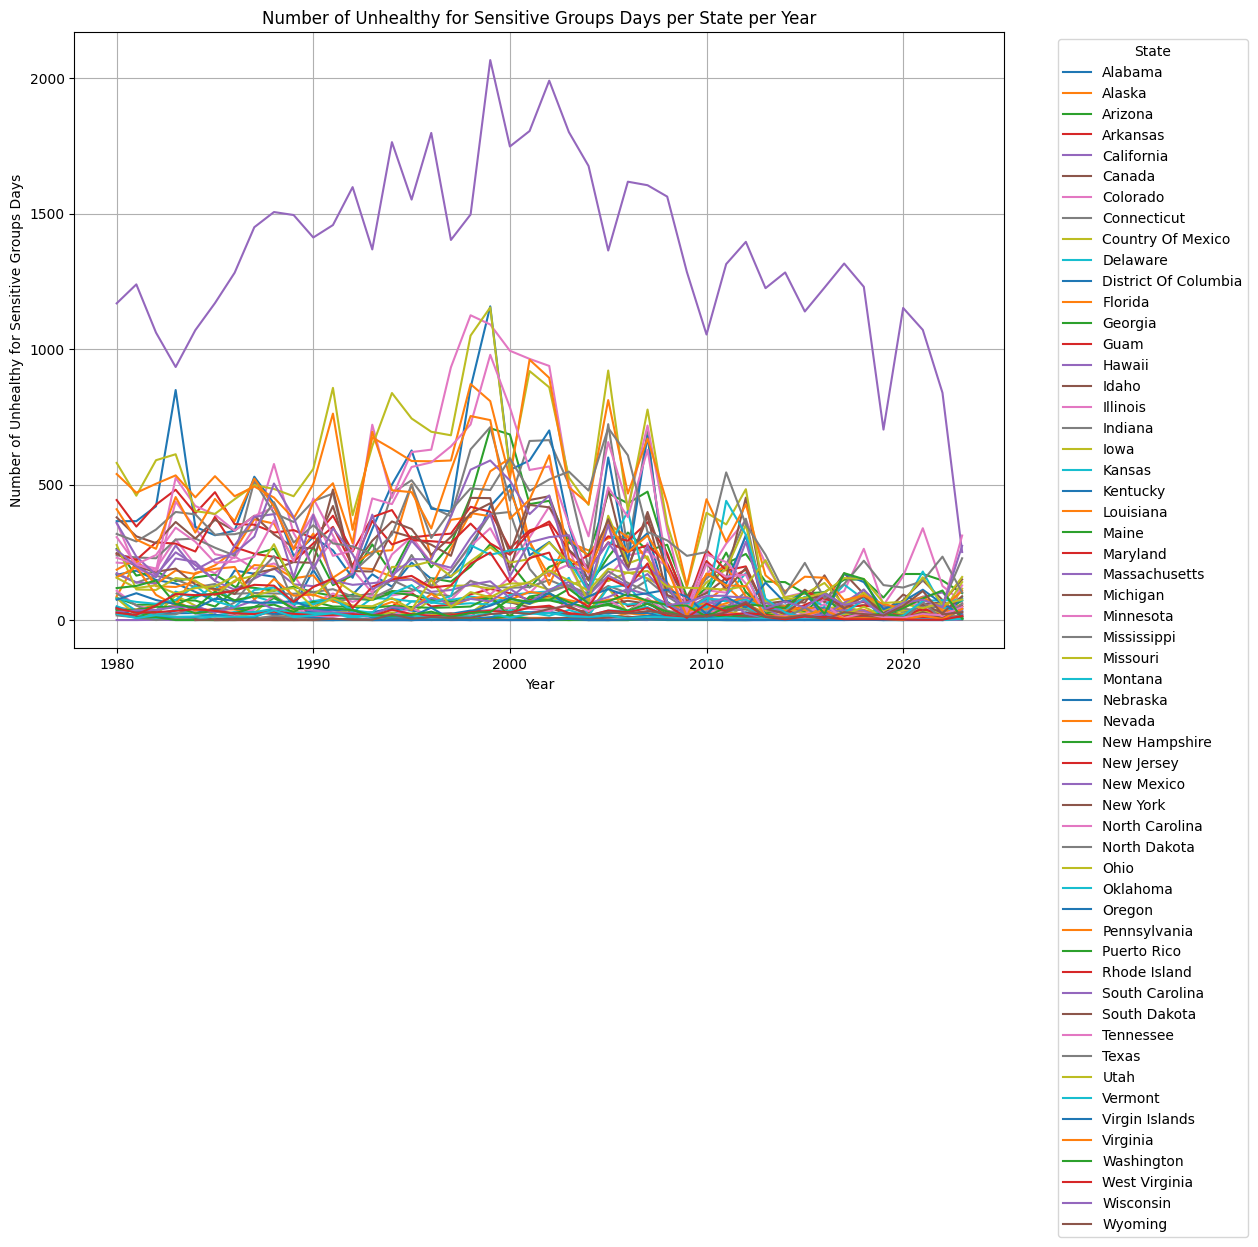

In [63]:
usg_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Unhealthy for Sensitive Groups Days'].sum().reset_index()

states = usg_days_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8))  

for state in states:
    state_data = usg_days_per_state_per_year[usg_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Unhealthy for Sensitive Groups Days'], label=state)

plt.title('Number of Unhealthy for Sensitive Groups Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unhealthy for Sensitive Groups Days')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Unhealthy days

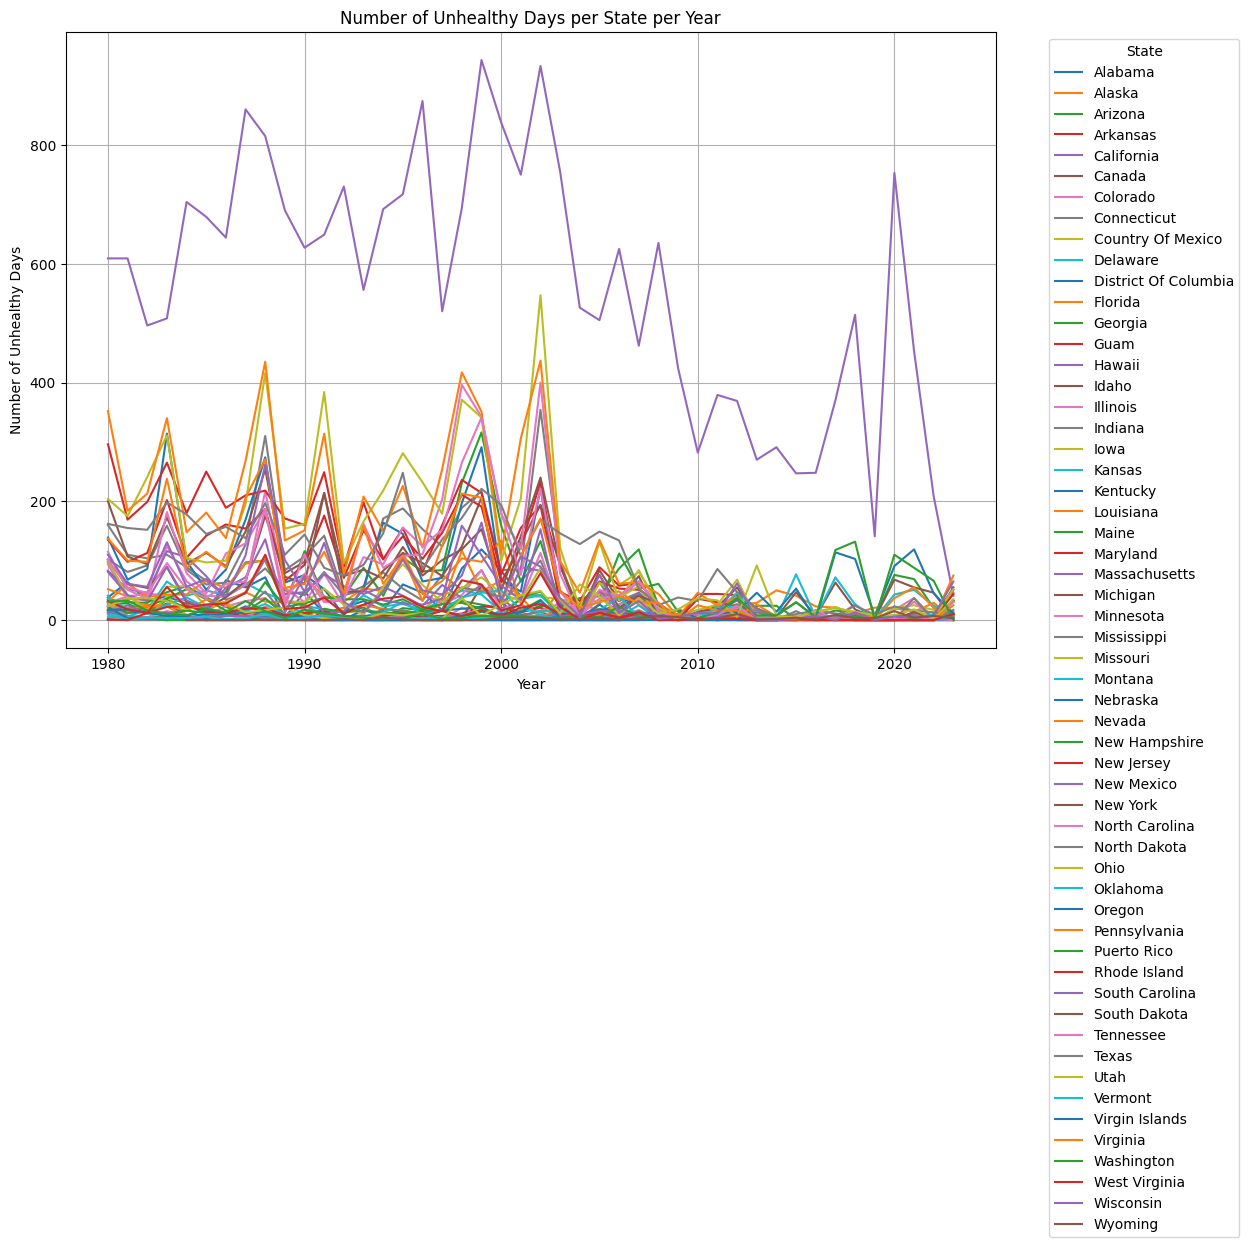

In [61]:
unhealthy_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Unhealthy Days'].sum().reset_index()

states = unhealthy_days_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8))  

for state in states:
    state_data = unhealthy_days_per_state_per_year[unhealthy_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Unhealthy Days'], label=state)

plt.title('Number of Unhealthy Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unhealthy Days')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

very unhealthy days

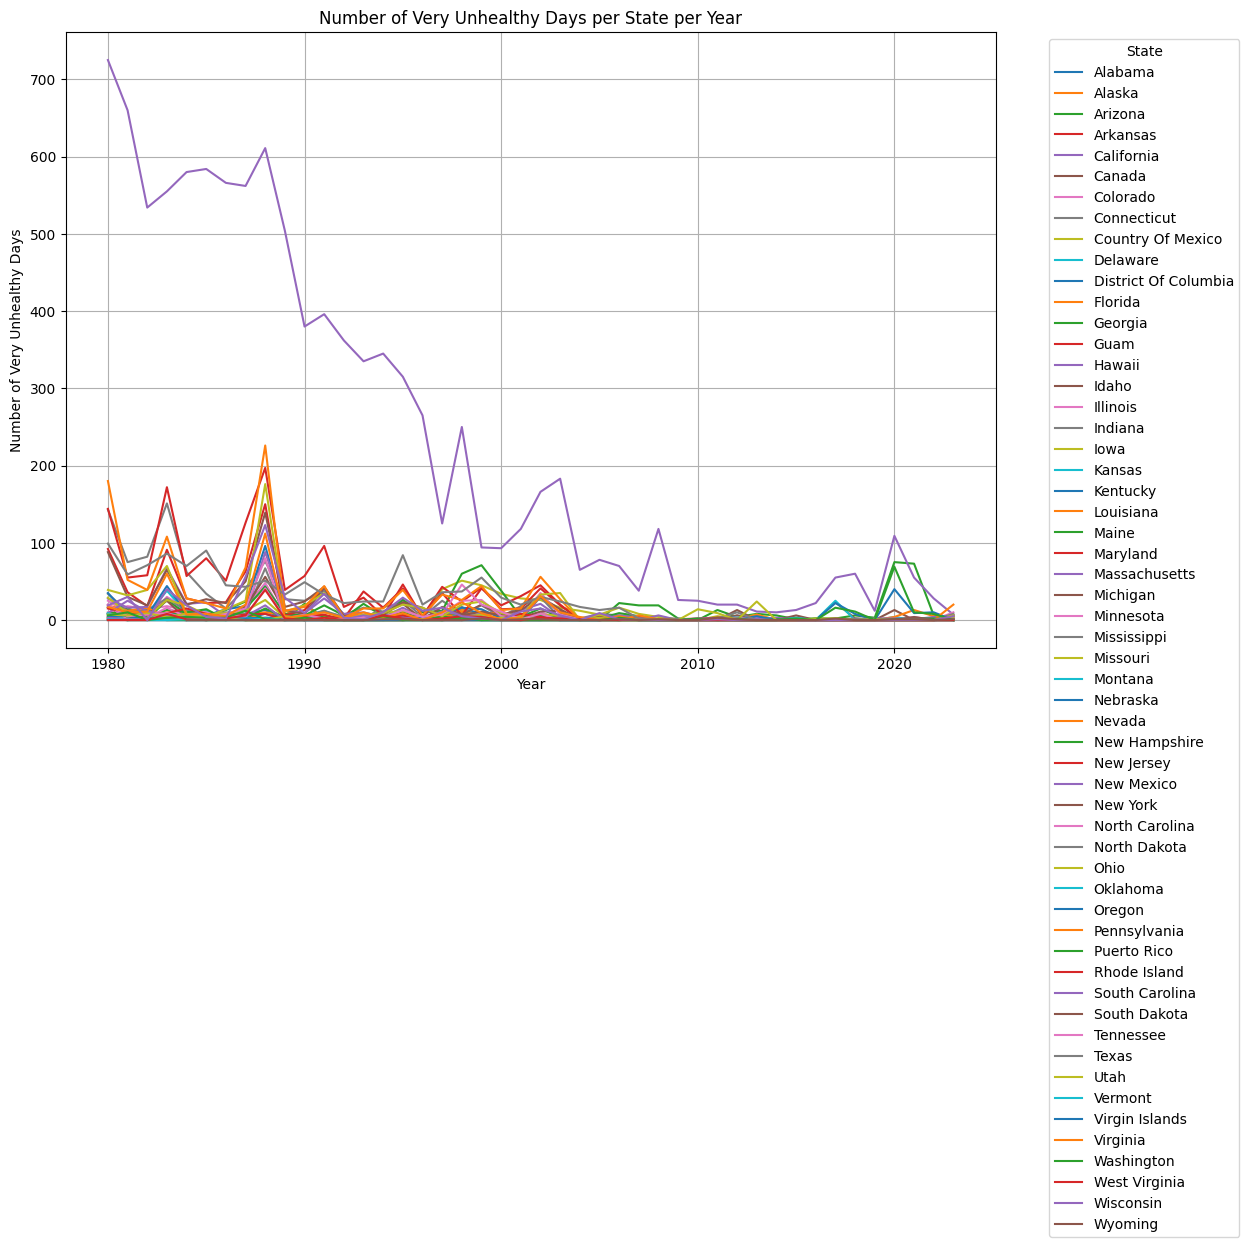

In [65]:
very_unhealthy_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Very Unhealthy Days'].sum().reset_index()

states = very_unhealthy_days_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8)) 

for state in states:
    state_data = very_unhealthy_days_per_state_per_year[very_unhealthy_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Very Unhealthy Days'], label=state)

plt.title('Number of Very Unhealthy Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Very Unhealthy Days')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Hazardous days 

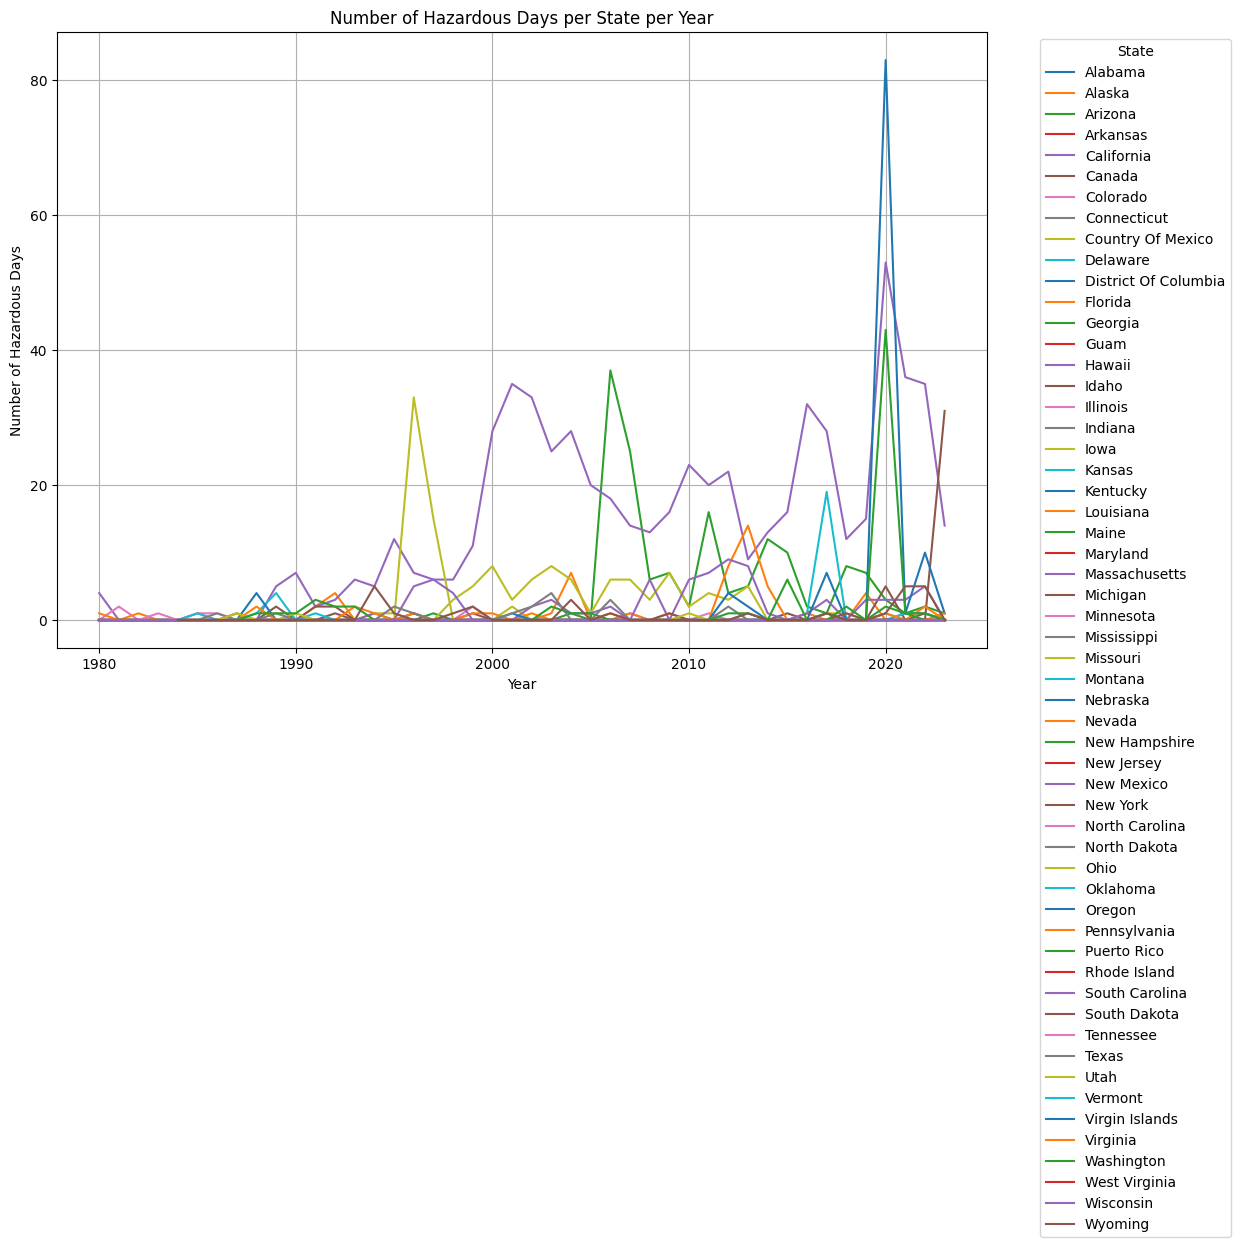

In [66]:
hazardous_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Hazardous Days'].sum().reset_index()

states = hazardous_days_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8))  

for state in states:
    state_data = hazardous_days_per_state_per_year[hazardous_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Hazardous Days'], label=state)

plt.title('Number of Hazardous Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hazardous Days')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Gases per state per year**

CO

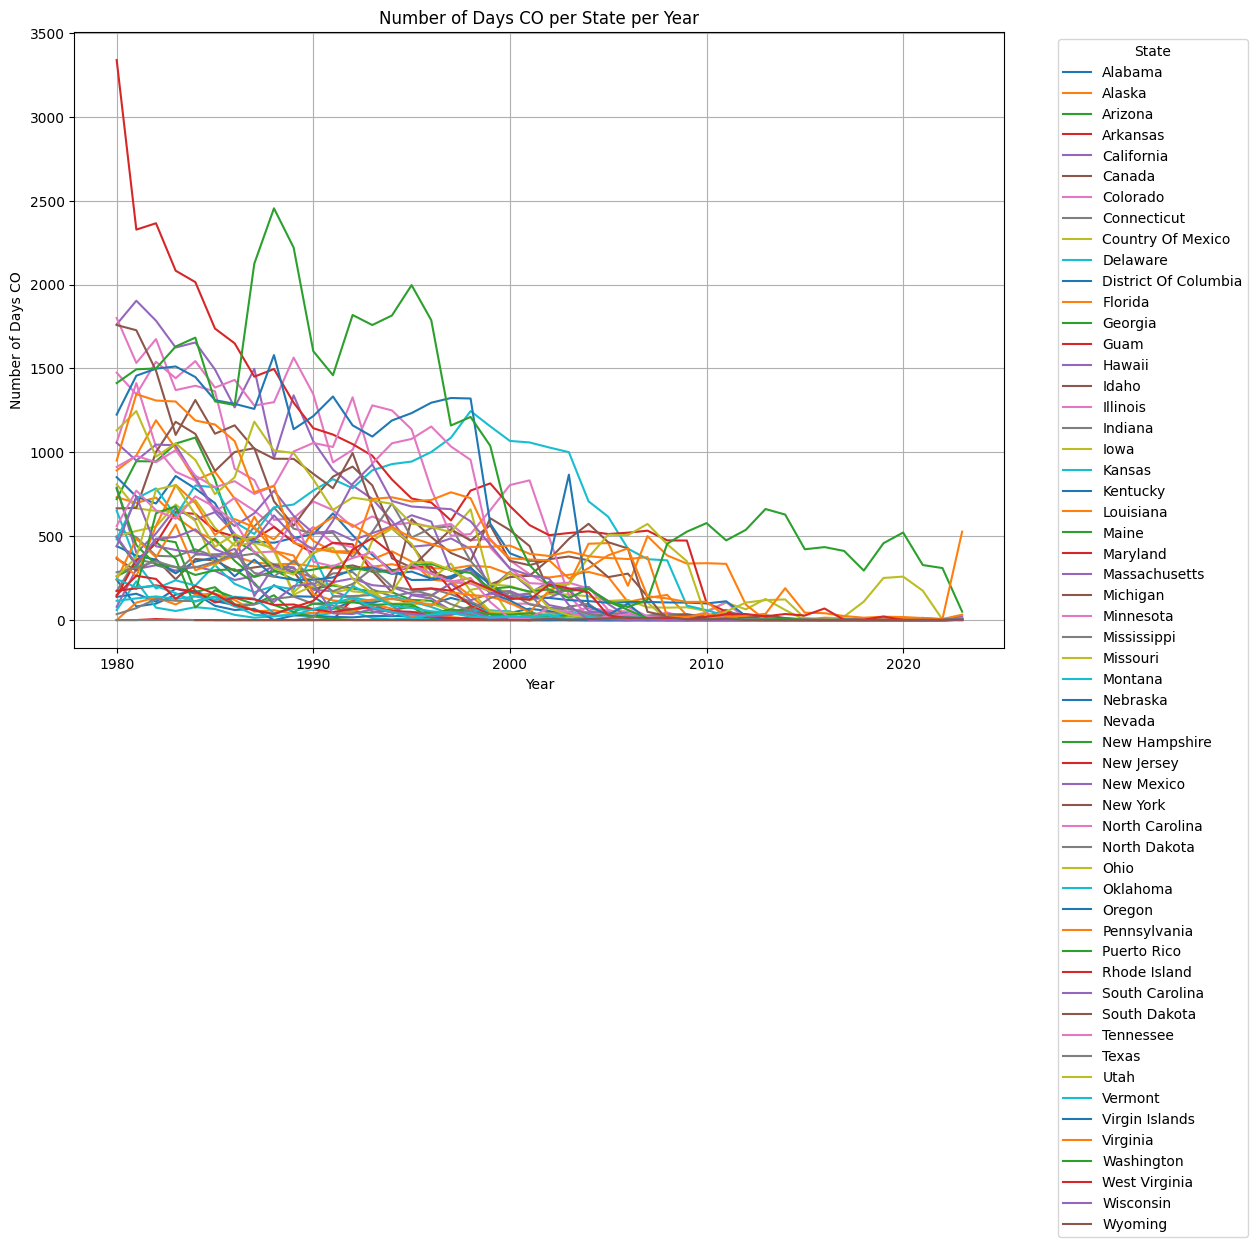

In [68]:
days_co_per_state_per_year = aq_df.groupby(['State', 'Year'])['Days CO'].sum().reset_index()

states = days_co_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8)) 

for state in states:
    state_data = days_co_per_state_per_year[days_co_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Days CO'], label=state)

plt.title('Number of Days CO per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Days CO')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

NO2

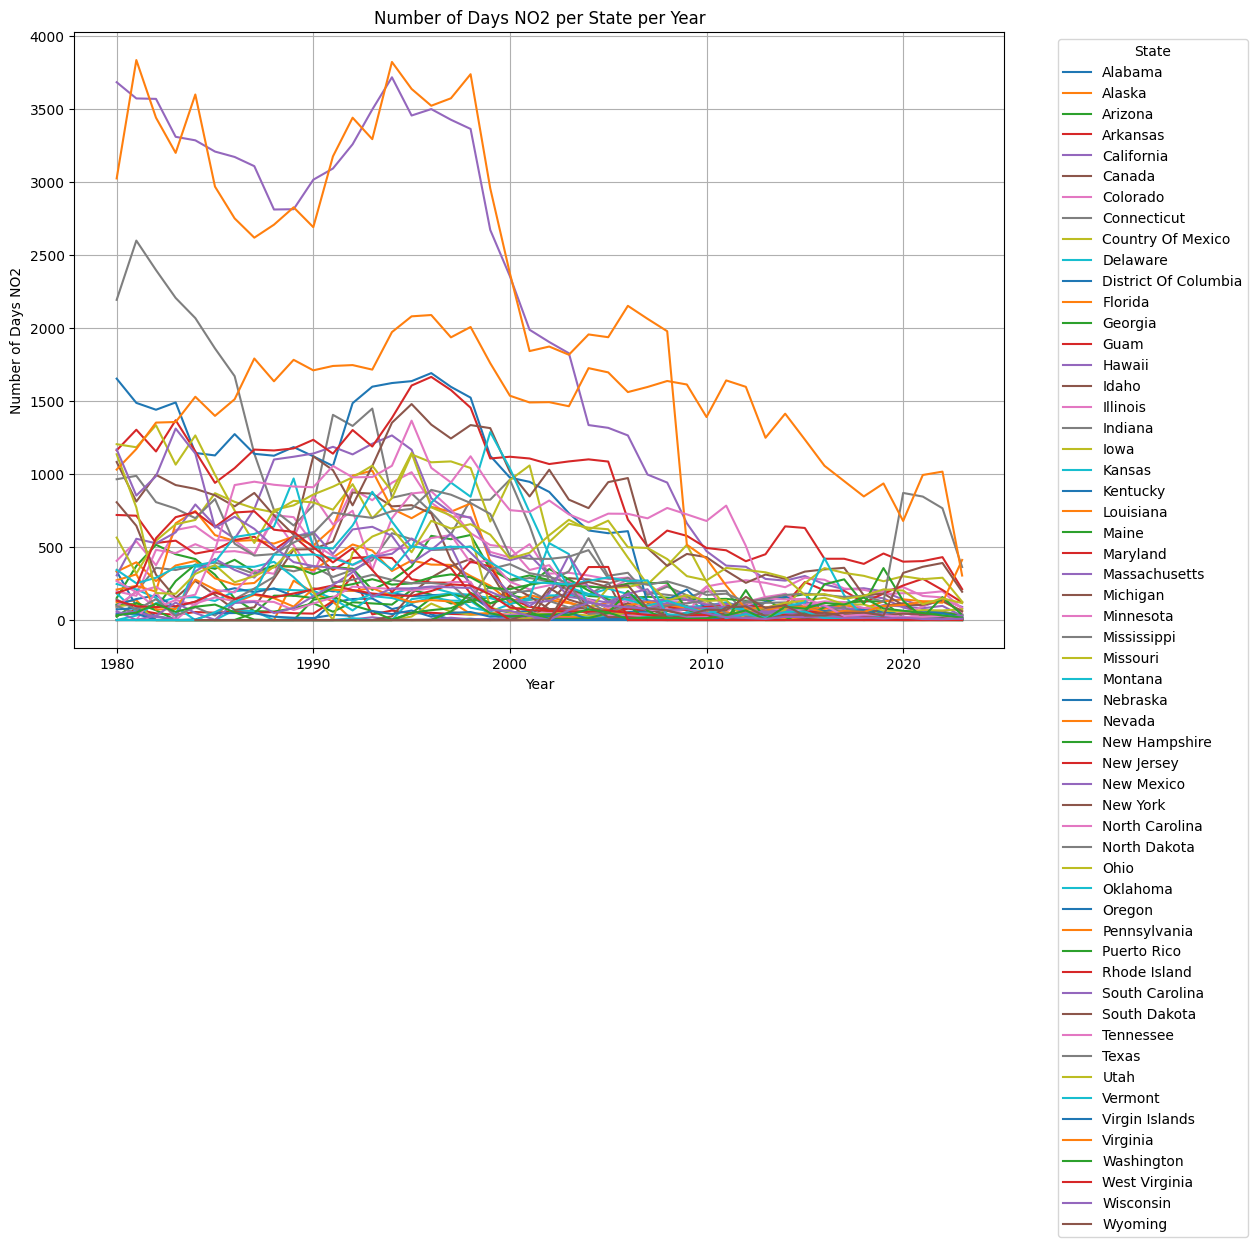

In [69]:
days_no2_per_state_per_year = aq_df.groupby(['State', 'Year'])['Days NO2'].sum().reset_index()

states = days_no2_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8)) 

for state in states:
    state_data = days_no2_per_state_per_year[days_no2_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Days NO2'], label=state)

plt.title('Number of Days NO2 per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Days NO2')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Ozone

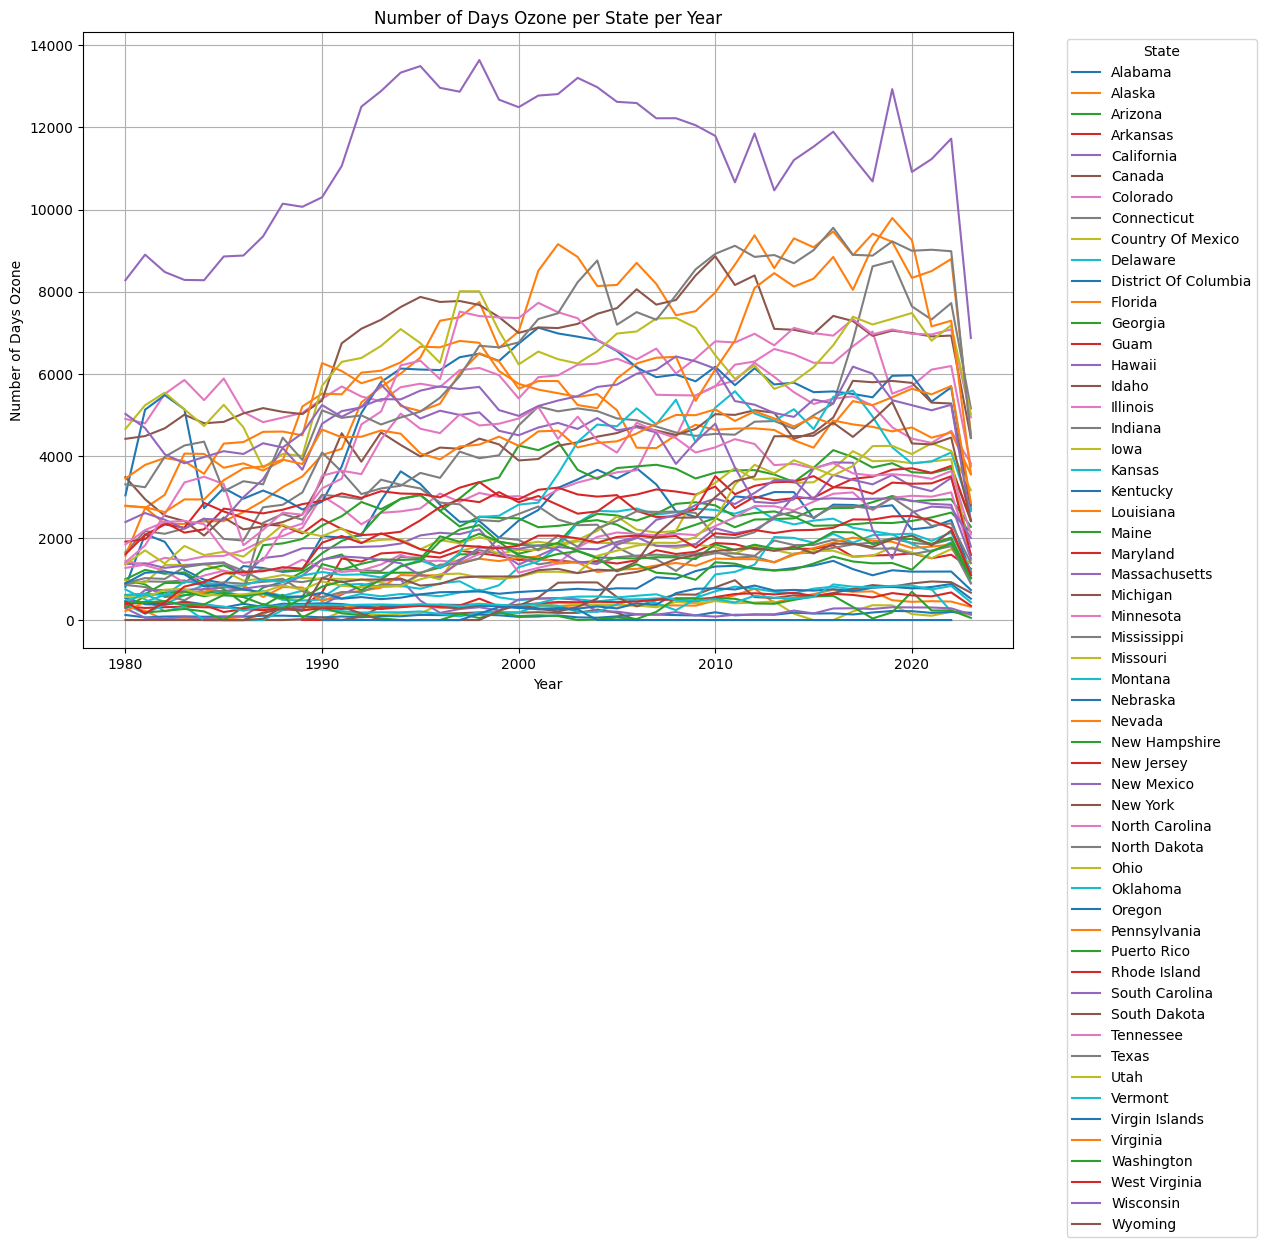

In [70]:
days_ozone_per_state_per_year = aq_df.groupby(['State', 'Year'])['Days Ozone'].sum().reset_index()

states = days_ozone_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8)) 

for state in states:
    state_data = days_ozone_per_state_per_year[days_ozone_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Days Ozone'], label=state)

plt.title('Number of Days Ozone per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Days Ozone')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [67]:
aq_df.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10'],
      dtype='object')

export the above images into an images folder